In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
pip install nilearn

     |████████████████████████████████| 2.5MB 22.5MB/s 


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
file_path = '/gdrive/My Drive/ADNI_053_S_1044_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080414092546702_S42960_I102405_normalized_masked.nii'

In [0]:
pip install nilearn

In [0]:
import numpy as np
import nilearn
def create_nifty_img_from_array(array): 
     return nib.Nifti1Image(array, affine=np.eye(4))

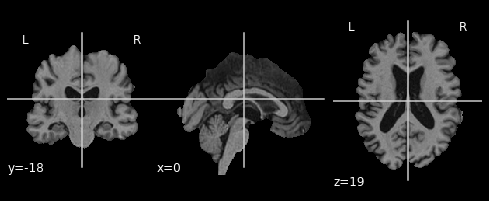

In [0]:
import nibabel as nib
from nilearn import plotting
from nilearn.image import image

img = nib.load('/gdrive/My Drive/ADNI_053_S_1044_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080414092546702_S42960_I102405_normalized_masked.nii')
plotting.plot_anat(img)

In [0]:
plotting.plot_anat(new_image)

NameError: ignored

In [0]:
img_array = img.get_fdata()

In [0]:
default_shape = img_array.shape

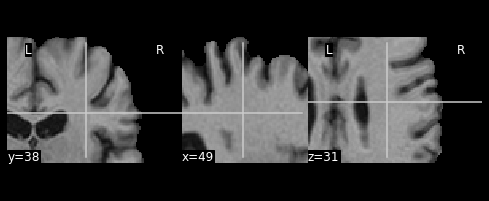

In [0]:
plotting.plot_anat( create_nifty_img_from_array(img_array[80:190,80:160,80:160]))

In [0]:
import random 

In [0]:
boxes = []
width = 5 
for _ in range(100):
    x = random.randint(0, default_shape[0]-width-1)
    y = random.randint(0, default_shape[1]-width-1)
    z = random.randint(0, default_shape[2]-width-1)
    box = img_array[x:x+5,y:y+5,z:z+5]
    box = box.reshape([5,5,5,1])
    boxes.append(box)
boxes = np.array(boxes)
boxes /= 255. 
train_dataset = tf.data.Dataset.from_tensor_slices((boxes, boxes))
train_dataset.batch(32)

<BatchDataset shapes: ((None, 5, 5, 5, 1), (None, 5, 5, 5, 1)), types: (tf.float64, tf.float64)>

In [0]:
conv = tf.keras.layers.Conv3D(64, (5,5,5),activation='relu',kernel_regularizer=tf.keras.regularizers.l2())
model = tf.keras.Sequential([
    tf.keras.layers.Input((5,5,5,1)), 
    conv,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(125),
    tf.keras.layers.Reshape((5,5,5,1))
])


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 1, 1, 1, 64)       8064      
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)               8125      
_________________________________________________________________
reshape_2 (Reshape)          (None, 5, 5, 5, 1)        0         
Total params: 16,189
Trainable params: 16,189
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])


In [0]:
history = model.fit(train_dataset.batch(32), epochs=500) 

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0400 - mse: 0.0216
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0304 - mse: 0.0173
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0137
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0171 - mse: 0.0108
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0083
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0064
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0075 - mse: 0.0051
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0041
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0034
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0047 - mse: 0.0028
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 

In [0]:
train_images, train_labels = next(iter(train_dataset))

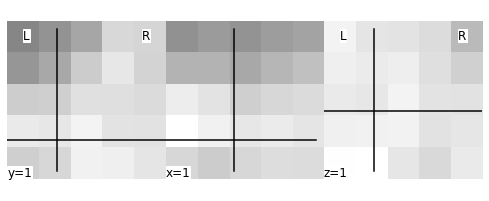

In [0]:
 plotting.plot_anat(create_nifty_img_from_array(train_images))

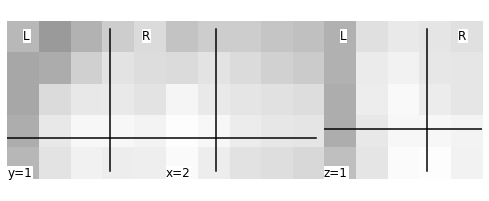

In [0]:
res = model.predict(np.reshape(train_images, (1,5,5,5,1)))
plotting.plot_anat(create_nifty_img_from_array(res[0]))

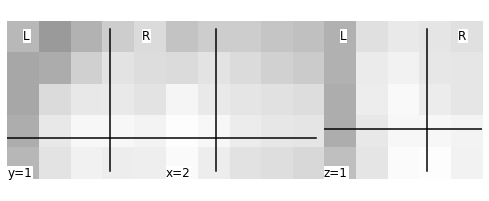

In [0]:
plotting.plot_anat(create_nifty_img_from_array(res[0]))

In [0]:
conv.set_weights(conv.get_weights())

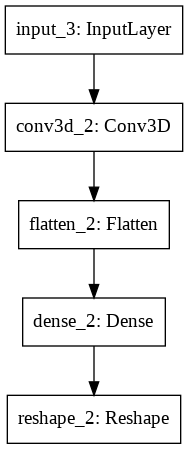

In [0]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [0]:
normalized_img = np.reshape(img.get_fdata(), newshape=(1, 193, 229, 193, 1))
train_dataset = tf.data.Dataset.from_tensor_slices((normalized_img, normalized_img)) 

In [0]:
def autoencoder_conv_model(input_shape=(5,5,5,1), conv_kernel=(5,5,5), conv_filters=64):
  fc_nodes = np.prod(input_shape)
  return tf.keras.Sequential([
    tf.keras.layers.Input(input_shape, name='Input'), 
    tf.keras.layers.Conv3D(conv_filters, (5,5,5),name='Encoder-Conv', activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(fc_nodes, name='Decoder'),
    tf.keras.layers.Reshape(input_shape, name='output')
])


In [0]:
def payan_montana_model(pretrained_conv=None):
  #TODO: add paper name
  input_shape = (68, 95, 79, 1)
  assert len(input_shape) == 4 
  fc_size = 800
  input_layer = tf.keras.layers.Input(input_shape, name=f'Input')
  conv_layer1 = tf.keras.layers.Convolution3D(150, (5,5,5), name='Conv-1', activation='relu')(input_layer)
  conv_layer2 = tf.keras.layers.Convolution3D(150, (5,5,5), name='Conv-2', activation='relu')(input_layer)
  conv_layer3 = tf.keras.layers.Convolution3D(150, (5,5,5), name='Conv-3', activation='relu')(input_layer)
  maxp_layer1 = tf.keras.layers.MaxPool3D(name='MaxP-1', pool_size=(5,5,5))(conv_layer1)
  maxp_layer2 = tf.keras.layers.MaxPool3D(name='MaxP-2', pool_size=(5,5,5))(conv_layer2)
  maxp_layer3 = tf.keras.layers.MaxPool3D(name='MaxP-3', pool_size=(5,5,5))(conv_layer3)
  flat_layer = tf.keras.layers.Concatenate(name='Concat')([maxp_layer1, maxp_layer2, maxp_layer3])
  fc_layer = tf.keras.layers.Dense(fc_size,name=f'FC-{fc_size}', activation='relu')(flat_layer)
  output_layer = tf.keras.layers.Dense(3, name='Classification', activation='softmax')(fc_layer)

  return tf.keras.Model(input_layer, output_layer)
model = payan_montana_model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 68, 95, 79,  0                                            
__________________________________________________________________________________________________
Conv-1 (Conv3D)                 (None, 64, 91, 75, 1 18900       Input[0][0]                      
__________________________________________________________________________________________________
Conv-2 (Conv3D)                 (None, 64, 91, 75, 1 18900       Input[0][0]                      
__________________________________________________________________________________________________
Conv-3 (Conv3D)                 (None, 64, 91, 75, 1 18900       Input[0][0]                      
____________________________________________________________________________________________

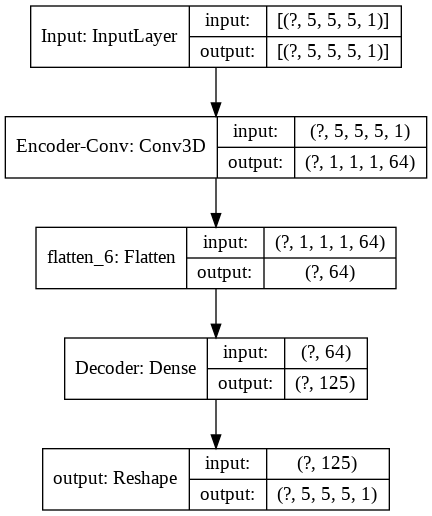

In [0]:
tf.keras.utils.plot_model(model=autoencoder_conv_model(), show_shapes=True)